<a href="https://colab.research.google.com/github/Jonathan-C-Barrett/GEOG5990M/blob/main/GEOG5003M_Final_Project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5003M Final Assignment (Template)

Student ID number:

GitHub repo link:

Word count limit= 1,500 words max (markdown cells only, excluding readme)

In [1]:
# read in required packages

import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt

!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 11.9 MB/s eta 0:00:00


In [2]:
#Read in Health Services Data
ahah = pd.read_csv('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/refs/heads/main/ahah_v4.csv')
ahah.head()

,LSOA21CD,ah4blue,ah4dent,ah4gp,ah4hosp,ah4phar,ah4leis,ah4pubs,ah4ffood,ah4gpas,...,ah4g_rnk,ah4e_rnk,ah4r_rnk,ah4h_pct,ah4g_pct,ah4e_pct,ah4r_pct,ah4ahah,ah4ahah_rnk,ah4ahah_pct
0,E01000001,1.8048,0.6328,1.0316,0.9581,0.7487,0.3596,0.4210,0.3920,0.1056,...,40830,42589,41495,2,96,100,98,59.7543,42592,100
1,E01000002,2.1041,0.6230,1.3232,1.1370,0.6849,0.5571,0.4852,0.3946,0.0778,...,42201,42590,41673,4,99,100,98,65.4344,42635,100
2,E01000003,2.2753,0.5709,0.8562,0.7862,0.5919,0.4608,0.5679,0.5919,0.1339,...,40631,42590,40857,1,96,100,96,57.4313,42559,100
3,E01000005,1.1553,0.8337,1.1078,0.8697,0.6657,0.3717,0.2673,0.2934,0.0774,...,40765,42616,42419,2,96,100,100,64.3384,42629,100
4,E01000006,1.9055,1.9361,0.9587,1.5191,1.3641,1.5219,1.5017,1.1499,0.3310,...,23517,41369,34909,22,56,98,82,33.5326,38389,91


In [3]:
#Select only columns relating to Health Services
health = ahah[['LSOA21CD', 'ah4dent', 'ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h']]
health.head()

,LSOA21CD,ah4dent,ah4gp,ah4hosp,ah4phar,ah4leis,ah4h
0,E01000001,0.6328,1.0316,0.9581,0.7487,0.3596,-1.7834
1,E01000002,0.6230,1.3232,1.1370,0.6849,0.5571,-1.5523
2,E01000003,0.5709,0.8562,0.7862,0.5919,0.4608,-1.9813
3,E01000005,0.8337,1.1078,0.8697,0.6657,0.3717,-1.7260
4,E01000006,1.9361,0.9587,1.5191,1.3641,1.5219,-0.6686


In [4]:
#check for missing values
health.isna().sum()

,0
LSOA21CD,0
ah4dent,0
ah4gp,0
ah4hosp,0
ah4phar,0
ah4leis,0
ah4h,0


In [5]:
#Read in Median Property Sales
m_sales = pd.read_csv('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/refs/heads/main/land-registry-house-prices-Meidan-LSOA.csv')
m_sales.head()

,Code,Area,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,...,Year ending Sep 2015,Year ending Dec 2015,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,Year ending Mar 2017,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E01000001,City of London 001A,108500.0,119500.0,121250.0,133750.0,150000.0,141750.0,151000.0,140000.0,...,870000.0,872500.0,910000.0,975000.0,999000.0,985000.0,965000.0,907500.0,950000.0,935000.0
2,E01000002,City of London 001B,113500.0,129000.0,114000.0,132000.0,122500.0,120000.0,122500.0,125000.0,...,800000.0,844525.0,880000.0,845000.0,842500.0,845000.0,847500.0,875000.0,850000.0,849950.0
3,E01000003,City of London 001C,74000.0,74000.0,79000.0,79000.0,76000.0,107893.0,120000.0,127500.0,...,500000.0,525000.0,630000.0,685000.0,745000.0,717500.0,722000.0,750000.0,751000.0,760000.0
4,E01000005,City of London 001E,NaN,55000.0,57850.0,57850.0,56425.0,57000.0,54500.0,55000.0,...,430000.0,510000.0,570500.0,585000.0,556000.0,556000.0,540000.0,520000.0,NaN,NaN


In [6]:
#Select only columns relating to 2016
prop_16 = m_sales[['Code', 'Area','Year ending Mar 2016','Year ending Jun 2016', 'Year ending Sep 2016', 'Year ending Dec 2016']]
prop_16.head()

,Code,Area,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016
0,NaN,NaN,NaN,NaN,NaN,NaN
1,E01000001,City of London 001A,910000.0,975000.0,999000.0,985000.0
2,E01000002,City of London 001B,880000.0,845000.0,842500.0,845000.0
3,E01000003,City of London 001C,630000.0,685000.0,745000.0,717500.0
4,E01000005,City of London 001E,570500.0,585000.0,556000.0,556000.0


In [7]:
#examine property info for count and data type
prop_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code                  4835 non-null   object 
 1   Area                  4835 non-null   object 
 2   Year ending Mar 2016  4744 non-null   float64
 3   Year ending Jun 2016  4713 non-null   float64
 4   Year ending Sep 2016  4681 non-null   float64
 5   Year ending Dec 2016  4643 non-null   float64
dtypes: float64(4), object(2)
memory usage: 226.8+ KB


In [8]:
#check for missing values
prop_16.isna().sum()

,0
Code,1
Area,1
Year ending Mar 2016,92
Year ending Jun 2016,123
Year ending Sep 2016,155
Year ending Dec 2016,193


In [9]:
#create a column of mean value to counter missing values
prop_16['2016_year'] = prop_16[['Year ending Mar 2016', 'Year ending Jun 2016', 'Year ending Sep 2016', 'Year ending Dec 2016']].mean(axis=1)
prop_16.head()

/tmp/ipython-input-9-2036285032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_16['2016_year'] = prop_16[['Year ending Mar 2016', 'Year ending Jun 2016', 'Year ending Sep 2016', 'Year ending Dec 2016']].mean(axis=1)


,Code,Area,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,2016_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E01000001,City of London 001A,910000.0,975000.0,999000.0,985000.0,967250.0
2,E01000002,City of London 001B,880000.0,845000.0,842500.0,845000.0,853125.0
3,E01000003,City of London 001C,630000.0,685000.0,745000.0,717500.0,694375.0
4,E01000005,City of London 001E,570500.0,585000.0,556000.0,556000.0,566875.0


In [10]:
prop_16.isna().sum()

,0
Code,1
Area,1
Year ending Mar 2016,92
Year ending Jun 2016,123
Year ending Sep 2016,155
Year ending Dec 2016,193
2016_year,58


In [11]:
#add conversion to LSOA21
LSOA21 = pd.read_csv('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/refs/heads/main/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Best_Fit_Lookup_for_EW_(V2).csv')
LSOA21.head()


,ObjectId,LSOA11CD,LSOA11NM,LSOA21CD,LSOA21NM,LAD22CD,LAD22NM,LAD22NMW
0,1,E01000001,City of London 001A,E01000001,City of London 001A,E09000001,City of London,NaN
1,2,E01000002,City of London 001B,E01000002,City of London 001B,E09000001,City of London,NaN
2,3,E01000003,City of London 001C,E01000003,City of London 001C,E09000001,City of London,NaN
3,4,E01000005,City of London 001E,E01000005,City of London 001E,E09000001,City of London,NaN
4,5,E01000006,Barking and Dagenham 016A,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,NaN


In [12]:
#inspect info for data type
LSOA21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34753 entries, 0 to 34752
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ObjectId  34753 non-null  int64 
 1   LSOA11CD  34753 non-null  object
 2   LSOA11NM  34753 non-null  object
 3   LSOA21CD  34753 non-null  object
 4   LSOA21NM  34753 non-null  object
 5   LAD22CD   34753 non-null  object
 6   LAD22NM   34753 non-null  object
 7   LAD22NMW  1909 non-null   object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [13]:
#combine prop_16 data and LSOA21 by code in prop_16 and LSOA11CD in LSOA21 in to remove areas outside london and make comparable
prop_16_LSOA21 = pd.merge(prop_16, LSOA21, left_on='Code', right_on='LSOA11CD', how='left')
prop_16_LSOA21.head()

,Code,Area,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,2016_year,ObjectId,LSOA11CD,LSOA11NM,LSOA21CD,LSOA21NM,LAD22CD,LAD22NM,LAD22NMW
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E01000001,City of London 001A,910000.0,975000.0,999000.0,985000.0,967250.0,1.0,E01000001,City of London 001A,E01000001,City of London 001A,E09000001,City of London,NaN
2,E01000002,City of London 001B,880000.0,845000.0,842500.0,845000.0,853125.0,2.0,E01000002,City of London 001B,E01000002,City of London 001B,E09000001,City of London,NaN
3,E01000003,City of London 001C,630000.0,685000.0,745000.0,717500.0,694375.0,3.0,E01000003,City of London 001C,E01000003,City of London 001C,E09000001,City of London,NaN
4,E01000005,City of London 001E,570500.0,585000.0,556000.0,556000.0,566875.0,4.0,E01000005,City of London 001E,E01000005,City of London 001E,E09000001,City of London,NaN


In [14]:
#check Info for count
prop_16_LSOA21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code                  4835 non-null   object 
 1   Area                  4835 non-null   object 
 2   Year ending Mar 2016  4744 non-null   float64
 3   Year ending Jun 2016  4713 non-null   float64
 4   Year ending Sep 2016  4681 non-null   float64
 5   Year ending Dec 2016  4643 non-null   float64
 6   2016_year             4778 non-null   float64
 7   ObjectId              4835 non-null   float64
 8   LSOA11CD              4835 non-null   object 
 9   LSOA11NM              4835 non-null   object 
 10  LSOA21CD              4835 non-null   object 
 11  LSOA21NM              4835 non-null   object 
 12  LAD22CD               4835 non-null   object 
 13  LAD22NM               4835 non-null   object 
 14  LAD22NMW              0 non-null      object 
dtypes: float64(6), object

In [15]:
#combine health and property data by LSOA code in property to remove areas outside london
health_prop = pd.merge(health, prop_16_LSOA21, left_on='LSOA21CD', right_on='LSOA21CD', how='right')
health_prop.head()

,LSOA21CD,ah4dent,ah4gp,ah4hosp,ah4phar,ah4leis,ah4h,Code,Area,Year ending Mar 2016,...,Year ending Sep 2016,Year ending Dec 2016,2016_year,ObjectId,LSOA11CD,LSOA11NM,LSOA21NM,LAD22CD,LAD22NM,LAD22NMW
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E01000001,0.6328,1.0316,0.9581,0.7487,0.3596,-1.7834,E01000001,City of London 001A,910000.0,...,999000.0,985000.0,967250.0,1.0,E01000001,City of London 001A,City of London 001A,E09000001,City of London,NaN
2,E01000002,0.6230,1.3232,1.1370,0.6849,0.5571,-1.5523,E01000002,City of London 001B,880000.0,...,842500.0,845000.0,853125.0,2.0,E01000002,City of London 001B,City of London 001B,E09000001,City of London,NaN
3,E01000003,0.5709,0.8562,0.7862,0.5919,0.4608,-1.9813,E01000003,City of London 001C,630000.0,...,745000.0,717500.0,694375.0,3.0,E01000003,City of London 001C,City of London 001C,E09000001,City of London,NaN
4,E01000005,0.8337,1.1078,0.8697,0.6657,0.3717,-1.7260,E01000005,City of London 001E,570500.0,...,556000.0,556000.0,566875.0,4.0,E01000005,City of London 001E,City of London 001E,E09000001,City of London,NaN


In [16]:
#check info for data frame to check count and data type
health_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LSOA21CD              4835 non-null   object 
 1   ah4dent               4835 non-null   float64
 2   ah4gp                 4835 non-null   float64
 3   ah4hosp               4835 non-null   float64
 4   ah4phar               4835 non-null   float64
 5   ah4leis               4835 non-null   float64
 6   ah4h                  4835 non-null   float64
 7   Code                  4835 non-null   object 
 8   Area                  4835 non-null   object 
 9   Year ending Mar 2016  4744 non-null   float64
 10  Year ending Jun 2016  4713 non-null   float64
 11  Year ending Sep 2016  4681 non-null   float64
 12  Year ending Dec 2016  4643 non-null   float64
 13  2016_year             4778 non-null   float64
 14  ObjectId              4835 non-null   float64
 15  LSOA11CD             

In [17]:
#check for missing values
health_prop.isnull().sum()

,0
LSOA21CD,1
ah4dent,1
ah4gp,1
ah4hosp,1
ah4phar,1
ah4leis,1
ah4h,1
Code,1
Area,1
Year ending Mar 2016,92


In [18]:
#remove missing values from Year mean column
health_prop = health_prop.dropna(subset=['2016_year'])

In [22]:
#Check removed 2016 Mean missing values
health_prop.isnull().sum()

,0
LSOA21CD,0
ah4dent,0
ah4gp,0
ah4hosp,0
ah4phar,0
ah4leis,0
ah4h,0
Code,0
Area,0
Year ending Mar 2016,34


In [24]:
#remove duplicated and unneccessary columns from Data base
health_prop_clean = health_prop.drop(columns=['Code', 'Area', 'LSOA11NM', 'LSOA11CD', 'ObjectId','LAD22NMW'])
health_prop_clean.head()


,LSOA21CD,ah4dent,ah4gp,ah4hosp,ah4phar,ah4leis,ah4h,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,2016_year,LSOA21NM,LAD22CD,LAD22NM
1,E01000001,0.6328,1.0316,0.9581,0.7487,0.3596,-1.7834,910000.0,975000.0,999000.0,985000.0,967250.00,City of London 001A,E09000001,City of London
2,E01000002,0.6230,1.3232,1.1370,0.6849,0.5571,-1.5523,880000.0,845000.0,842500.0,845000.0,853125.00,City of London 001B,E09000001,City of London
3,E01000003,0.5709,0.8562,0.7862,0.5919,0.4608,-1.9813,630000.0,685000.0,745000.0,717500.0,694375.00,City of London 001C,E09000001,City of London
4,E01000005,0.8337,1.1078,0.8697,0.6657,0.3717,-1.7260,570500.0,585000.0,556000.0,556000.0,566875.00,City of London 001E,E09000001,City of London
5,E01032739,0.6641,1.6422,1.1970,0.6810,0.4148,-1.5235,599975.0,605500.0,582500.0,585000.0,593243.75,City of London 001F,E09000001,City of London


In [25]:
#check data type and missing values of required columns
health_prop_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4778 entries, 1 to 4835
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LSOA21CD              4778 non-null   object 
 1   ah4dent               4778 non-null   float64
 2   ah4gp                 4778 non-null   float64
 3   ah4hosp               4778 non-null   float64
 4   ah4phar               4778 non-null   float64
 5   ah4leis               4778 non-null   float64
 6   ah4h                  4778 non-null   float64
 7   Year ending Mar 2016  4744 non-null   float64
 8   Year ending Jun 2016  4713 non-null   float64
 9   Year ending Sep 2016  4681 non-null   float64
 10  Year ending Dec 2016  4643 non-null   float64
 11  2016_year             4778 non-null   float64
 12  LSOA21NM              4778 non-null   object 
 13  LAD22CD               4778 non-null   object 
 14  LAD22NM               4778 non-null   object 
dtypes: float64(11), object(4)


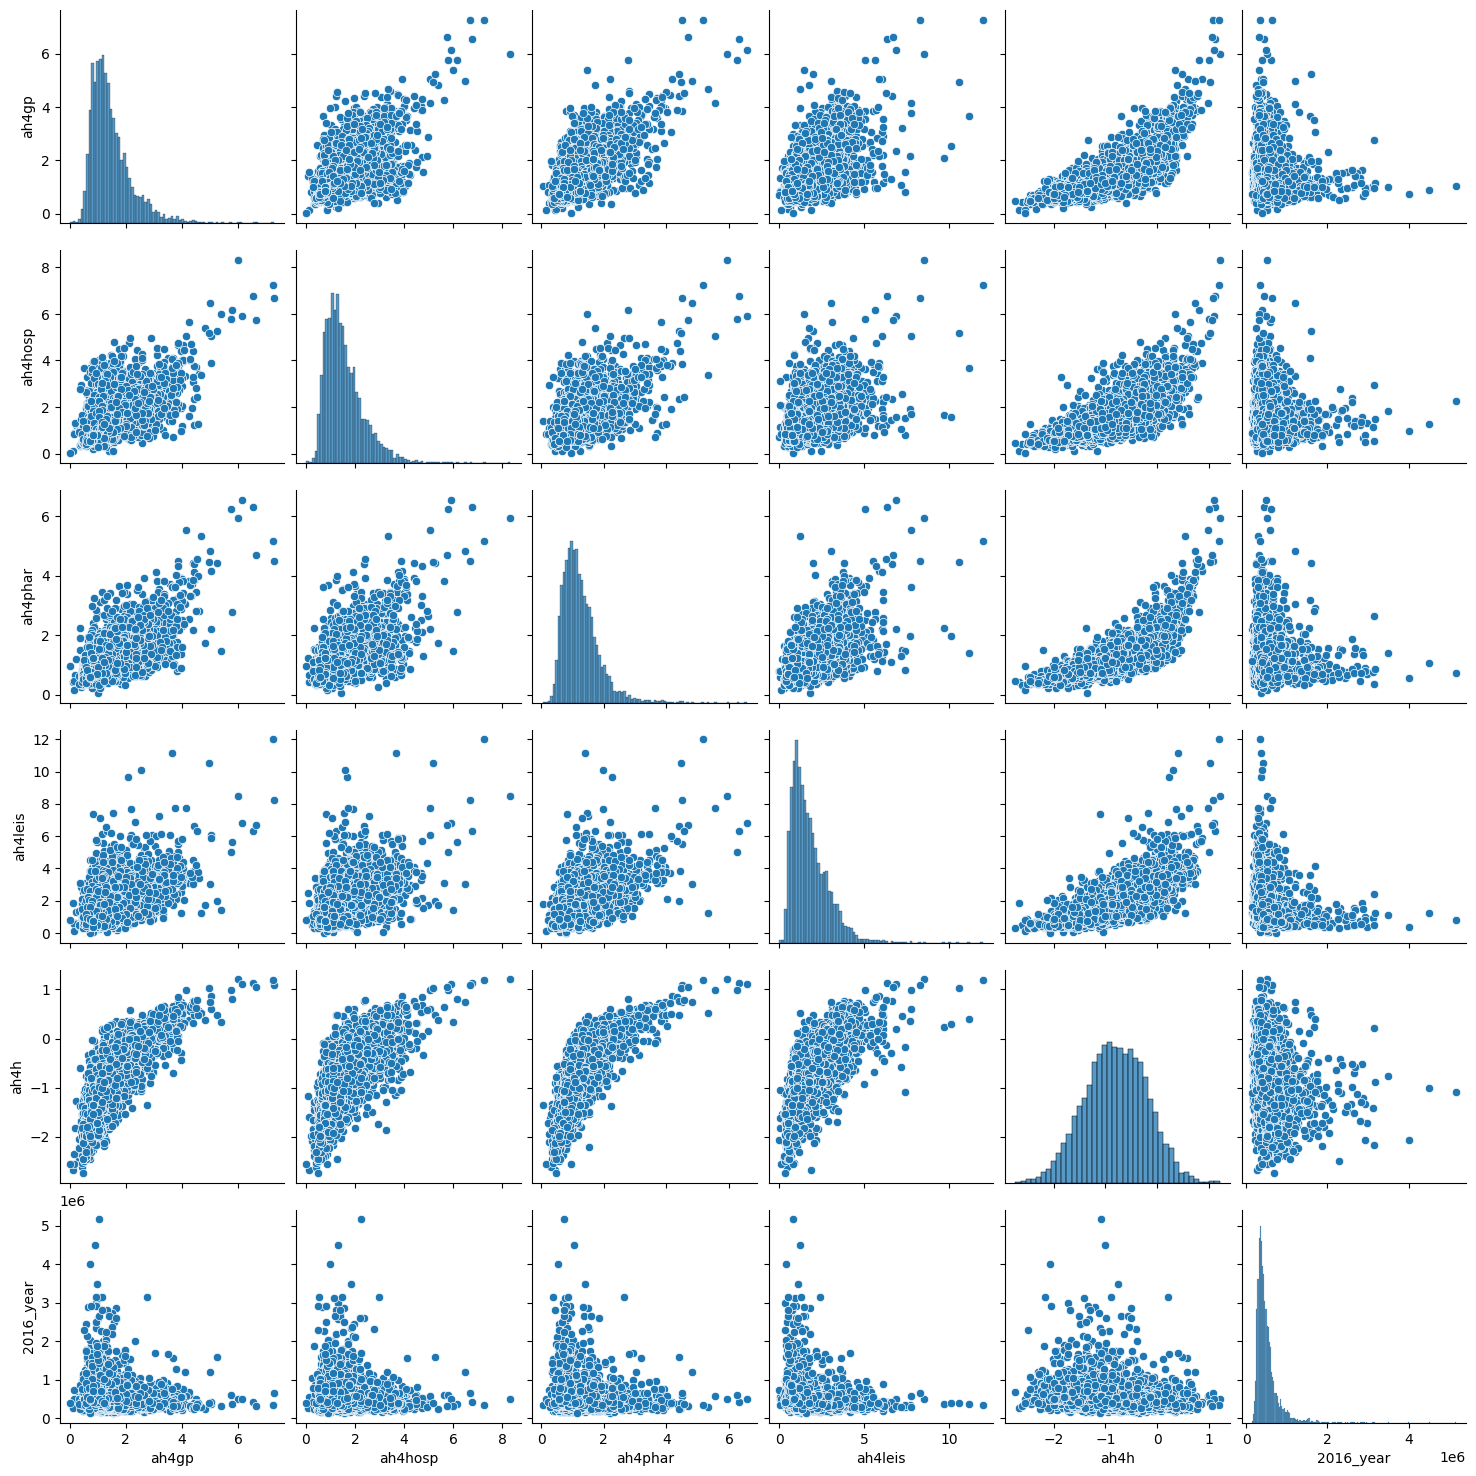

In [108]:
#Explore correlation between property price mean and health service float data with pairplot
sns.pairplot(health_prop_clean[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_year']]);

In [37]:
#check for outliers observed in pairplot
health_prop_clean['2016_year'].nlargest(n=50)

,2016_year
4745,5168250.00
2905,4501500.00
2895,4010784.50
2920,3502250.00
4747,3162500.00
4772,3157450.75
207,3139375.00
2933,3113750.00
2847,2983735.00
4746,2926250.00


# **SPATIAL VISULAISATION **

In [2]:
# Data downloaded from https://geoportal.statistics.gov.uk/datasets/f23c50d2bffa4a8d9693bcf4ed72bdaf_0/explore?location=0.278866%2C-2.487028%2C0.00
shp =gpd.read_file('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/refs/heads/main/CMLAD_Dec_2011_SGCB_GB_2022_5882430432395265005.geojson')


In [3]:
#inspect data
shp.head()

,OBJECTID,cmlad11cd,cmlad11nm,cmlad11nmw,GlobalID,geometry
0,32,E41000032,Luton,,c0fc3ba7-e2b0-4014-949c-ff4b98184a3e,"POLYGON ((-0.40756 51.91069, -0.40244 51.9097,..."
1,33,E41000033,Southend-on-Sea,,3f2d9e3e-a142-433a-9619-d196f4174c5e,"MULTIPOLYGON (((0.75315 51.55487, 0.76986 51.5..."
2,34,E41000034,Thurrock,,9e42d208-9abf-4e34-b43b-ea7beae6278b,"MULTIPOLYGON (((0.39181 51.56721, 0.39353 51.5..."
3,35,E41000035,Medway,,9bdd1fa6-cbef-4648-af38-af3a1acd741b,"MULTIPOLYGON (((0.55364 51.48494, 0.55456 51.4..."
4,36,E41000036,Bracknell Forest,,69ea3d20-66d6-499e-b7e1-7b5dba88f4a7,"POLYGON ((-0.76463 51.45972, -0.75733 51.45902..."


In [ ]:
#combine boundary data and health and property data through LSOA code
ldn_prop = pd.merge(shp, prop_16, left_on='LSOA21CD', right_on='Code', how='right')
ldn_prop.head()

In [ ]:
#inspect data
ldn_prop.isnull().sum()

In [76]:
ldn_health_prop.to_file('London.geojson')

In [ ]:
ldn_health_prop.explore()

In [81]:
#select only london boroughs
london_shp= shp.loc[shp['LSOA21NM'].str.contains('City of London') |
                    shp['LSOA21NM'].str.contains('Barking and Dagenham')|
                    shp['LSOA21NM'].str.contains('Barnet')|
                    shp['LSOA21NM'].str.contains('Bexley')|
                    shp['LSOA21NM'].str.contains('Brent') |
                    shp['LSOA21NM'].str.contains('Bromley')|
                    shp['LSOA21NM'].str.contains('Camden')|
                    shp['LSOA21NM'].str.contains('Croydon')|
                    shp['LSOA21NM'].str.contains('Ealing')|
                    shp['LSOA21NM'].str.contains('Enfield')|
                    shp['LSOA21NM'].str.contains('Greenwich')|
                    shp['LSOA21NM'].str.contains('Hackney')|
                    shp['LSOA21NM'].str.contains('Hammersmith and Fulham')|
                    shp['LSOA21NM'].str.contains('Haringey')|
                    shp['LSOA21NM'].str.contains('Harrow')|
                    shp['LSOA21NM'].str.contains('Havering')|
                    shp['LSOA21NM'].str.contains('Hillingdon')|
                    shp['LSOA21NM'].str.contains('Hounslow')|
                    shp['LSOA21NM'].str.contains('Islington')|
                    shp['LSOA21NM'].str.contains('Kensington and Chelsea')|
                    shp['LSOA21NM'].str.contains('Kingston upon Thames')|
                    shp['LSOA21NM'].str.contains('Lambeth')|
                    shp['LSOA21NM'].str.contains('Lewisham')|
                    shp['LSOA21NM'].str.contains('Merton')|
                    shp['LSOA21NM'].str.contains('Newham')|
                    shp['LSOA21NM'].str.contains('Redbridge')|
                    shp['LSOA21NM'].str.contains('Richmond upon Thames')|
                    shp['LSOA21NM'].str.contains('Southwark')|
                    shp['LSOA21NM'].str.contains('Sutton')|
                    shp['LSOA21NM'].str.contains('Southwark')|
                    shp['LSOA21NM'].str.contains('Tower Hamlets')|
                    shp['LSOA21NM'].str.contains('Waltham Forest')|
                    shp['LSOA21NM'].str.contains('Wandsworth')|
                    shp['LSOA21NM'].str.contains('Westminster'),:]

In [84]:
#investigate data
london_shp.isnull().sum()

,0
FID,0
OA21CD,0
LSOA21CD,0
LSOA21NM,0
LSOA21NMW,0
BNG_E,0
BNG_N,0
LAT,0
LONG,0
GlobalID,0


In [ ]:
#explore on leaflet map
london_shp.explore()

In [ ]:
#check for missing values
london_shp.isna().sum()

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>